In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import imageio
import scipy as sp

from mpl_toolkits import mplot3d

from scipy.optimize import curve_fit
from PIL import Image

from scipy.special import softmax
import imageio
#np.set_printoptions(precision=1)
%matplotlib notebook
#plt.close('all')

In [41]:
def make_nodefeature(x,y,r,t):
    A=np.zeros((len(x),2))
       
    
    



def make_adjacency(x,y,r,t,ide,split_id,run):
    A=np.zeros((len(x),len(x)))
    x_id = []
    t_id = []
    for i in range(len(x)):
        x_id.append(i+1)
        t_id.append(t[i])
        for j in range(len(x)):
            if ide[i]==ide[j] and ide[i]!=-2:
                if t[i]+1==t[j] or t[i]-1==t[j]:
                    A[i,j]=1
            elif ide[i]==split_id[j]:
                if ide[i]==-1:
                    A[i,j]=1
                elif t[i]+1==t[j] or t[i]-1==t[j]:
                    A[i,j]=1
              
    
    
    np.savetxt('./'+str(run)+'_GT'+'/'+'A.txt', A,fmt='%i')
    np.savetxt('./'+str(run)+'/'+'timetable.txt',np.c_[x_id,t_id], fmt='%i',delimiter='\t')
    
    return A
        

    
def make_weighted_adj_estimate(x,y,t,run):
    
    #emb without void node
    
    x=x[1:]
    y=y[1:]
    t=t[1:]
    
    #############
    
    A=np.zeros((len(x),len(x)))
    
    for i in range(len(x)):
        for j in range(len(x)):
            #A[i,0]=1.5  ####
            if t[i]+1==t[j]: #t[i]+1==t[j] or
                A[i,j]=gaus2d(x[j], y[j], x[i], y[i]) #1/((x[i]-x[j])**2+(y[i]-y[j])**2)
            #if i>j:
                #A[i,j]=0
        if np.sum(A[i,:])!=0:
            A[i,:]=mean_normal(A[i,:])
        #print(A[i,:],i)
       
    A=A.round(decimals=2)
    
    np.savetxt('./'+str(run)+'/'+'B.txt', A)
    return A
    
    
def make_dist_matrix(x,y,t,run):
    A=np.zeros((len(x),len(x)))
    
    for i in range(len(x)):
        for j in range(len(x)):
            if t[i]+1==t[j]: #t[i]+1==t[j] or
                A[i,j]=np.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)
       
    
    
    np.savetxt('./'+str(run)+'/'+'D.txt', A)
    return A


def make_weighted_edgelist(A,run):
    
    e1=[]
    e2=[]
    w=[]
    
    
    for i in range(len(A)):
        for j in range(len(A)):
            if A[i,j]==0:
                A[i,j]=0.01
            if i>j and j!=0:
                A[i,j]=0
            
            if A[i,j]!=0:
                e1.append(int(i+1))
                e2.append(int(j+1))
                w.append(A[i,j]*100)
    
    
    np.savetxt('./node2vec/graph/'+str(run)+'.edgelist', np.c_[e1,e2,w], fmt='%i',delimiter='\t')
    return A,e1,e2,w



def make_true_edgelist(A,run):
    
    e1=[]
    e2=[]
    w=[]
    
    
    for i in range(len(A)):
        for j in range(len(A)):
            if i>j:
                A[i,j]=0
            
            if A[i,j]!=0:
                e1.append(int(i+1))
                e2.append(int(j+1))
                #w.append(A[i,j])
    
    
    np.savetxt('./'+str(run)+'_GT'+'/'+'A.edgelist', np.c_[e1,e2], fmt='%i',delimiter='\t')
    return 0


def mean_normal(x):
    s=np.sum(x)
    return x #x/s


def gaus2d(x, y, mx, my, sx=0.07, sy=0.07):
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))



def padding(maxlen,run):
    #A,B,E
    
    B=np.loadtxt('./'+str(run)+'/'+'B.txt')
    A=np.loadtxt('./'+str(run)+'_GT'+'/'+'A.txt')
    E=np.loadtxt('./'+str(run)+'/'+'embed.txt')
    
    
    for i in range(len(A)):
        for j in range(len(A)):
            if i>j:
                A[i,j]=0
                B[i,j]=0
                
    np.savetxt('./'+str(run)+'_GT'+'/'+'A_padded.txt', A,fmt='%i')
    #A=np.zeros((4,4))
    #B=np.zeros((4,4))
    
   #E=np.ones((4,6))
    
    h=np.ones(maxlen)*-1
    v=np.ones(len(A[0]))*-1
    
    #
    cur_E=len(E)
    cur_A=len(A)
    cur_Ah=len(A[0])
    zero_line=np.zeros(len(E[0]))
    for i in range(maxlen-cur_E):
        E=np.vstack([E, zero_line])
        
    for j in range(maxlen-cur_A):
        A=np.vstack([A, v])
        B=np.vstack([B, v])
        
    for z in range(maxlen-cur_Ah):
        A=np.column_stack([A, h])
        B=np.column_stack([B, h])
        
    #np.savetxt('./'+str(run)+'_GT'+'/'+'A_padded.txt', A,fmt='%i')
    np.savetxt('./'+str(run)+'/'+'B_padded.txt', B)
    np.savetxt('./'+str(run)+'/'+'embed_padded.txt',E)
    print(A.shape)   
    return A,B,E    
    
#x = np.linspace(-5, 5)
#y = np.linspace(-5, 5)
#x, y = np.meshgrid(x, y) # get 2D variables instead of 1D
#z = gaus2d(x, y)

#def correct(A,B,E,max_len,run):



#def A_B_dense(A,B):

def fit_func(x,a,b):
    return a*x+b

def fingerprint_emb(pos_x,pos_y,window,t,run,void_node=True,a_x=113.89266922,b_x=19.51478307,a_y=-114.14194117,b_y=131.3404747):
    x_l,x_r,y_l,y_u=calibrate_pix_pos(pos_x,pos_y,a_x,b_x,a_y,b_y,window)
    im = blend(run,t)#Image.open(path).convert('L') # Can be many different formats.
    im_crop = im.crop((x_l, y_l, x_r, y_u))
     
    if t==9 and run==95:
        im_crop.show()
    foo = im_crop.resize((10,10),Image.ANTIALIAS)

    imarray = np.asarray(foo)
    imarray=imarray.flatten()/255
    return imarray



def fingerprint_wrap(window,run,void=False):
    pos_x,pos_y,t= np.loadtxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt',skiprows=1, delimiter='\t',usecols=(0,1,6), unpack=True)
    l=len(pos_x)-1
    
    
    f_e = np.array([np.zeros(100)])


    for k in range(int(np.max(t))+1):
        path='/home/mo/Desktop/IWR/TimeGraph2.0/'+str(run)+'/'+str(k)+'.png'
        pos_x_n=pos_x[t==k]
        pos_y_n=pos_y[t==k]
        if k==0:
            pos_x_n=pos_x_n[1:]
            pos_y_n=pos_y_n[1:]
        for j in range(len(pos_x_n)):
            imarray=norm_im_array(np.array([fingerprint_emb(pos_x_n[j],pos_y_n[j],window,k,run)]),offset=8.745098039215686292e-01)
            f_e=np.concatenate((f_e, imarray), axis=0)
            
    
    if void==False:
        f_e=f_e[1:]
            
        
    return f_e
    
    
def blend(run,t):
    
    
    
    pathm1='/home/mo/Desktop/IWR/TimeGraph2.0/'+str(run)+'/'+str(t-1)+'.png'
    path='/home/mo/Desktop/IWR/TimeGraph2.0/'+str(run)+'/'+str(t)+'.png'
    pathp1='/home/mo/Desktop/IWR/TimeGraph2.0/'+str(run)+'/'+str(t+1)+'.png'
    
    
    im = Image.open(path).convert('L')
    shape = np.asarray(im).shape
    
    #print(pixels.shape)
    try:
        imm1 = Image.open(pathm1).convert('L')
        pixels = np.asarray(imm1)
        #print(pixels)
        pixels = pixels.astype('float32')
        pixels = pixels/2
        #pixels = pixels.astype('int')
        imm1 = Image.fromarray(pixels).convert('L')
    except:
        pix=255*np.ones(shape)
        pix = pix.astype('float32')
        pix = pix/2
        imm1 = Image.fromarray(pix).convert('L')
        
    try:
        imp1 = Image.open(pathp1).convert('L')
    except:
        pix=255*np.ones(shape)
        imp1 = Image.fromarray(pix).convert('L')
    
    
    
    im3 = Image.blend(imm1, imp1, 0.5)
    im4 = Image.blend(im3, im, 0.5)
    #im4.show()
    return im4
    
    

def norm_im_array(arr,offset):
    return (arr-offset)*10
    
    
    
'''
pos_x=[5.926355409057428858e-01,4.604170197372819962e-01,6.250962551422760416e-02,1.223613241454796496e-01,6.376507269405902179e-01,1.103583087228645621e-01,4.233227679149828004e-01]
pos_y=[5.378065857159227692e-01,5.482527480620434934e-01,1.628245440499290486e-01,8.255699686855265673e-01,5.184511465256566032e-01,1.492480151352687523e-01,5.115442664966730613e-01]
pix_x=[87,72,27,33,92,32,68]
pix_y=[70,69,113,37,72,114,73]


plt.errorbar(pos_y, pix_y,fmt='.')   

popt, pcov = curve_fit(fit_func, pos_y,pix_y)

plt.plot(pos_y, fit_func(np.array(pos_y),*popt))
print(popt)
'''

a_y=-114.14194117
a_x=113.89266922
b_y=131.3404747
b_x=19.51478307
    
def calibrate_pix_pos(pos_x,pos_y,a_x,b_x,a_y,b_y,window):
    pix_x0=int(fit_func(pos_x,a_x,b_x))
    
    pix_y0=int(fit_func(pos_y,a_y,b_y))
    #print(pix_x0,pix_y0,int(pix_x0-window))
    return int(pix_x0-window),int(pix_x0+window),int(pix_y0-window),int(pix_y0+window)

In [31]:
A=np.loadtxt('./'+str(2)+'/'+'embed.txt')
print(A)

A=np.vstack([A, np.zeros(len(A[0]))])
#A=np.append(A,np.zeros(len(A[0])))
#print(A)


A=np.ones((3,4))
B=np.zeros((3,2))
print(np.c_[A, B])
print(gaus2d(1.8*0.07, 1.8*0.07, 0, 0, sx=0.07, sy=0.07))


#A,B,E =padding(7,1)

#print(E)
#blend(10)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-1.0695065   0.9855033   0.15814735 ...  0.          0.
   0.        ]
 [-0.39349315  1.1270741   1.3228214  ...  0.          0.
   0.        ]
 ...
 [-0.30196086  0.08166734  0.5701734  ... -1.29411765 -0.23529412
  -1.49019608]
 [ 0.21191971  0.29448065  0.6547205  ...  0.03921569  0.
   0.        ]
 [ 0.24218586  0.05092519  0.47975934 ...  0.11764706  0.07843137
   0.        ]]
[[1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0. 0.]]
1.2720668358645384


In [42]:
lenA=[]
for i in range(1,100):

    run=i

    x,y,r,ide,split_id,split_prob,t= np.loadtxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt',skiprows=1, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)
    #print(len(x))
    A=make_adjacency(x,y,r,t,ide,split_id,run)
    print(len(A),i)
    lenA.append(len(A))
    
    B=make_weighted_adj_estimate(x,y,t,run)
    #print(B)
    C,e1,e2,w=make_weighted_edgelist(B,run)
    make_true_edgelist(A,run)
    
    make_dist_matrix(x,y,t,run)
    
maxlen=np.max(lenA)
print(maxlen)






214 1
214 2
179 3
235 4
230 5
227 6
233 7
221 8
230 9
192 10
171 11
232 12
221 13
244 14
222 15
203 16
222 17
234 18
199 19
250 20
273 21
226 22
274 23
190 24
210 25
205 26
233 27
223 28
227 29
208 30
228 31
211 32
217 33
218 34
222 35
307 36
214 37
290 38
224 39
255 40
214 41
218 42
237 43
256 44
230 45
210 46
239 47
235 48
277 49
238 50
282 51
235 52
199 53
234 54
247 55
223 56
243 57
279 58
223 59
232 60
230 61
224 62
230 63
225 64
220 65
206 66
196 67
205 68
236 69
291 70
231 71
262 72
240 73
242 74
231 75
241 76
223 77
256 78
225 79
218 80
243 81
245 82
215 83
225 84
283 85
240 86
229 87
234 88
237 89
245 90
224 91
234 92
250 93
264 94
207 95
253 96
237 97
198 98
205 99
307


In [43]:
#print(stop)

for i in range(1,100):

    run=i

    b = np.loadtxt('./node2vec/emb/'+str(run)+'.emb',skiprows=1, delimiter=' ', unpack=True)
    

    ind=np.argsort(b[0])

    for l in range(len(b)):
        b[l]= np.take_along_axis(b[l], ind,axis=0)  
    b=np.transpose(b)
    b=b[:,1:]
    
    
    ####
    b=np.concatenate((np.array([np.zeros(len(b[0]))]), b), axis=0) #######if void node not included in n2v
    ####
    
    
    f_e=fingerprint_wrap(20,run,void=True)  #always 000000000000000 for fingerprint
    b=np.c_[b, f_e]
    #print(len(f_e),run)
    
    #pos_x,pos_y= np.loadtxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt',skiprows=1, delimiter='\t',, unpack=True)
    #id,tt = np.loadtxt('./'+str(run)+'/'+'timetable.txt', delimiter='\t', usecols=(0,1), unpack=True)
    #split_prob = pos.T[:,5]
    #split_prob = split_prob[:, np.newaxis]
    #r = pos.T[:,2]
    #r=r[:, np.newaxis]
    
    #print(b.shape,pos.shape)
    
    #b=np.append(b,r,axis=1)
    #b=np.append(b,split_prob,axis=1)
    
    #np.savetxt('./'+str(run)+'/'+'embed.txt', b)
    
    
    ##remove below if n2v is used
    
    print(len(b[0]),run)
    
    #p = np.loadtxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt',skiprows=1, delimiter='\t', unpack=True)
    #split_prob = p.T[:,5]
    #print(len(split_prob),split_prob)
    #b = b.T[:,0:3]
    #split_prob=split_prob[:, np.newaxis]
    #print(len(b),b)
    
    #print(b.shape,split_prob.shape)
    
    #######b=np.append(b,split_prob,axis=1)
    
    #b=np.append(pos,split_prob,axis=1)
    
    
    #print(b)
    #b=np.repeat(b, 6, axis=1)
    #print(i)
    #print(b)
    
    np.savetxt('./'+str(run)+'/'+'embed.txt', b)
    #padding(maxlen,run)
    

150 1


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 212 and the array at index 1 has size 214

python ./src/main.py --input ./graph/14.edgelist --output ./emb/14.emb --dimensions 25 --walk-length 40 --num-walks 300 --window-size 30 --p 0.25 --q 4 --iter 20 --weighted

[ 0.         -0.1570277  -0.13240676  0.12840128 -0.08195633 -0.08104238
  0.10553309  0.01396061 -0.30724588 -0.01640669 -0.06985439  0.11843298
  0.16435455  0.05923014 -0.32740152 -0.27926245  0.11337734  0.09429799
 -0.17837065 -0.3225729  -0.05992775 -0.35559067  0.05547264 -0.126847
  0.25704092 -0.02137446 -0.1900955  -0.27029324 -0.2620652   0.04310043
  0.01920155  0.11957757 -0.28338537  0.27256814  0.1451876  -0.15957429
 -0.3894145   0.28181067  0.36676636  0.34786272  0.24737372 -0.4024745
 -0.25119326  0.36005843 -0.24471577  0.5032878  -0.22274649  0.5767908
  0.25600642  0.3124854   0.25944856 -0.17535232  0.53200775  0.78377587
  0.2875422  -0.09247601  0.17008342  0.17173739 -0.02560413  0.0680133
  0.12662536  0.18340994  0.17255418  0.7891184   0.87121755  0.09431815
  0.09673291  0.6415504   0.8290963   0.11552063  0.16383575  0.9068097
  0.23285295  0.02103018  0.13002482  0.30691758  0.6471821   0.1795587
  0.19382572  0.7401411   0.545709    0.29635575  0.121792

<IPython.core.display.Javascript object>


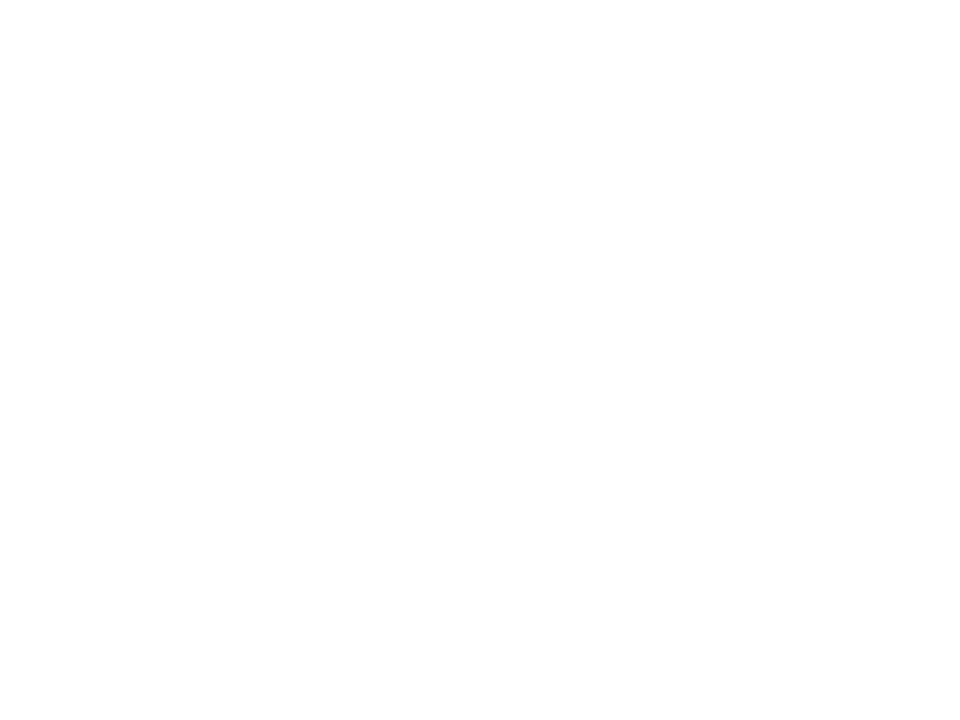

In [6]:

#np.savetxt('./node2vec/emb/'+str(10)+'.emb',i)
x,y= np.loadtxt('./'+str(2)+'/'+'embed.txt',usecols=(0,1),unpack=True)
print(x,y)
#i=ide
#print(i)
#print(i[0])
plt.scatter(x,y,s=1)
#plt.scatter(x[1],y[1],c='r')
#plt.scatter(x[i==4],y[i==4],c='blue')
#plt.scatter(x[i==5],y[i==5],c='g')
#plt.scatter(x[i==6],y[i==6],c='black')
#plt.scatter(x[i==7],y[i==7],c='violet')
#plt.scatter(x[i==10],y[i==10],c='orange')
#plt.scatter(x[i==2],y[i==2],c='grey')

<IPython.core.display.Javascript object>


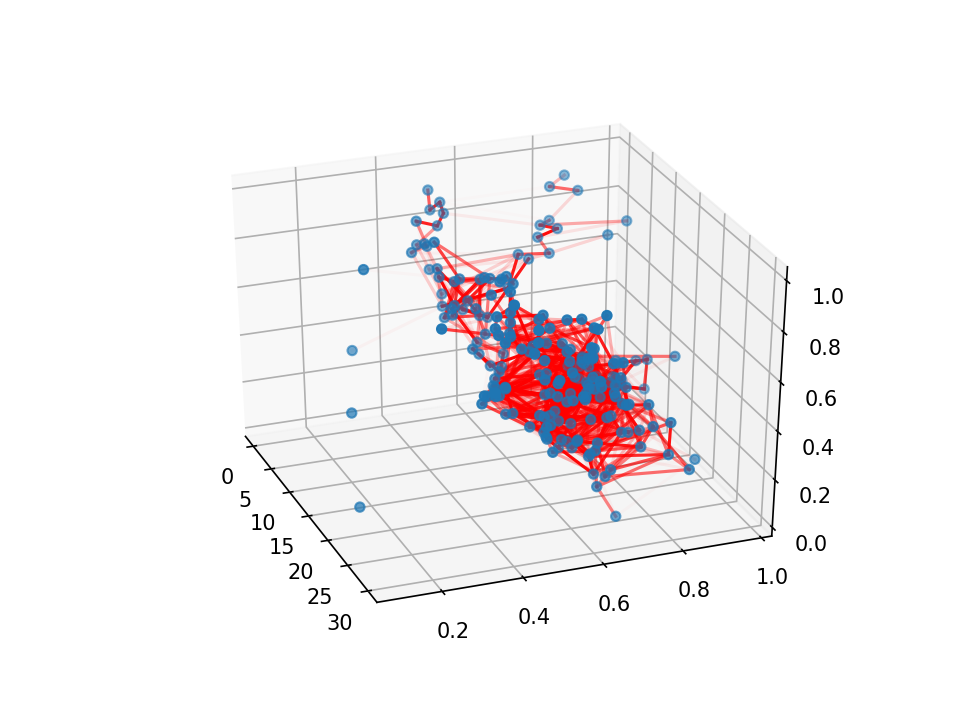

1.0 5.0
[0.9157314629258516, 0.8956927315152837]
2.0 6.0
[0.11312625250501002, 0.13882940994605658]
3.0 4.0
[0.9301603206412825, 0.8675871572397479]
4.0 7.0
[0.8675871572397479, 0.9119708548786334]
5.0 7.0
[0.8956927315152837, 0.9119708548786334]
5.0 9.0
[0.8956927315152837, 0.8830861305634619]
6.0 8.0
[0.13882940994605658, 0.08300273149384757]
7.0 10.0
[0.9119708548786334, 0.884121794758308]
7.0 12.0
[0.9119708548786334, 0.7955861305634618]
8.0 11.0
[0.08300273149384757, 0.16837993128325726]
8.0 13.0
[0.08300273149384757, 0.2004008016032064]
9.0 12.0
[0.8830861305634619, 0.7955861305634618]
10.0 15.0
[0.884121794758308, 0.8559071359341776]
10.0 16.0
[0.884121794758308, 0.8006365382834701]
11.0 14.0
[0.16837993128325726, 0.1803740561439286]
12.0 16.0
[0.7955861305634618, 0.8006365382834701]
13.0 14.0
[0.2004008016032064, 0.1803740561439286]
14.0 21.0
[0.1803740561439286, 0.14917377177431546]
15.0 19.0
[0.8559071359341776, 0.9050829172463883]
15.0 20.0
[0.8559071359341776, 0.80981577582

78.0 87.0
[0.49393578129808646, 0.594042862124482]
79.0 82.0
[0.5967508857098938, 0.5092508857098937]
79.0 84.0
[0.5967508857098938, 0.4903620025607576]
79.0 87.0
[0.5967508857098938, 0.594042862124482]
79.0 88.0
[0.5967508857098938, 0.8550722847224608]
80.0 82.0
[0.5503346299505331, 0.5092508857098937]
80.0 83.0
[0.5503346299505331, 0.3401363485267209]
80.0 84.0
[0.5503346299505331, 0.4903620025607576]
80.0 87.0
[0.5503346299505331, 0.594042862124482]
81.0 87.0
[0.8678986953474632, 0.594042862124482]
81.0 88.0
[0.8678986953474632, 0.8550722847224608]
82.0 90.0
[0.5092508857098937, 0.39603287873723025]
82.0 91.0
[0.5092508857098937, 0.5802372552165957]
82.0 92.0
[0.5092508857098937, 0.5353946352424522]
82.0 93.0
[0.5092508857098937, 0.5048154578231125]
83.0 90.0
[0.3401363485267209, 0.39603287873723025]
83.0 92.0
[0.3401363485267209, 0.5353946352424522]
84.0 90.0
[0.4903620025607576, 0.39603287873723025]
84.0 91.0
[0.4903620025607576, 0.5802372552165957]
84.0 92.0
[0.4903620025607576, 

116.0 133.0
[0.6553266226928103, 0.4264221490946049]
116.0 134.0
[0.6553266226928103, 0.5390728600757978]
116.0 135.0
[0.6553266226928103, 0.3836584724515014]
116.0 136.0
[0.6553266226928103, 0.4741187161279509]
116.0 138.0
[0.6553266226928103, 0.7148368795387567]
117.0 127.0
[0.8447890992645198, 0.6354633311806639]
117.0 128.0
[0.8447890992645198, 0.8360528785086248]
117.0 129.0
[0.8447890992645198, 0.8911367794595281]
117.0 138.0
[0.8447890992645198, 0.7148368795387567]
118.0 127.0
[0.5141301254565398, 0.6354633311806639]
118.0 130.0
[0.5141301254565398, 0.5459340129434609]
118.0 131.0
[0.5141301254565398, 0.4610103536006777]
118.0 132.0
[0.5141301254565398, 0.30861723446893785]
118.0 133.0
[0.5141301254565398, 0.4264221490946049]
118.0 134.0
[0.5141301254565398, 0.5390728600757978]
118.0 135.0
[0.5141301254565398, 0.3836584724515014]
118.0 136.0
[0.5141301254565398, 0.4741187161279509]
118.0 137.0
[0.5141301254565398, 0.30970165937019983]
118.0 138.0
[0.5141301254565398, 0.714836879

138.0 146.0
[0.7148368795387567, 0.8017388940540919]
138.0 148.0
[0.7148368795387567, 0.5527414726349279]
138.0 149.0
[0.7148368795387567, 0.8768824233048561]
139.0 152.0
[0.5227332323895401, 0.5242928222598606]
139.0 154.0
[0.5227332323895401, 0.37874710166148323]
139.0 157.0
[0.5227332323895401, 0.2891971095213034]
139.0 158.0
[0.5227332323895401, 0.35826576854583403]
139.0 159.0
[0.5227332323895401, 0.7153821183523753]
139.0 160.0
[0.5227332323895401, 0.5189044440105176]
139.0 161.0
[0.5227332323895401, 0.5989402955082461]
139.0 162.0
[0.5227332323895401, 0.6975601946407116]
139.0 163.0
[0.5227332323895401, 0.43975158936651815]
139.0 164.0
[0.5227332323895401, 0.6017295771197773]
140.0 152.0
[0.38564990511542635, 0.5242928222598606]
140.0 154.0
[0.38564990511542635, 0.37874710166148323]
140.0 157.0
[0.38564990511542635, 0.2891971095213034]
140.0 158.0
[0.38564990511542635, 0.35826576854583403]
140.0 160.0
[0.38564990511542635, 0.5189044440105176]
140.0 161.0
[0.38564990511542635, 0.

163.0 176.0
[0.43975158936651815, 0.5846382177658588]
164.0 165.0
[0.6017295771197773, 0.5378124806637187]
164.0 167.0
[0.6017295771197773, 0.4550667428826081]
164.0 168.0
[0.6017295771197773, 0.3782630400209477]
164.0 171.0
[0.6017295771197773, 0.6017295771197773]
164.0 172.0
[0.6017295771197773, 0.4975355468565842]
164.0 173.0
[0.6017295771197773, 0.6420987944160823]
164.0 174.0
[0.6017295771197773, 0.3726160679359998]
164.0 175.0
[0.6017295771197773, 0.8600602048944277]
164.0 176.0
[0.6017295771197773, 0.5846382177658588]
164.0 177.0
[0.6017295771197773, 0.7421907978352795]
165.0 179.0
[0.5378124806637187, 0.32616918774420334]
165.0 180.0
[0.5378124806637187, 0.627397897307626]
165.0 181.0
[0.5378124806637187, 0.5969781250682199]
165.0 183.0
[0.5378124806637187, 0.4994499410460954]
165.0 184.0
[0.5378124806637187, 0.5531400649774274]
165.0 186.0
[0.5378124806637187, 0.7213654575479502]
165.0 187.0
[0.5378124806637187, 0.473079795955286]
165.0 188.0
[0.5378124806637187, 0.33110956991

189.0 193.0
[0.6408712032292868, 0.4561450021834215]
189.0 194.0
[0.6408712032292868, 0.6217078705629148]
189.0 196.0
[0.6408712032292868, 0.6965196439081707]
189.0 197.0
[0.6408712032292868, 0.8528016708069907]
189.0 198.0
[0.6408712032292868, 0.6628813204018751]
189.0 199.0
[0.6408712032292868, 0.7085770975500233]
189.0 201.0
[0.6408712032292868, 0.8349240791956319]
190.0 202.0
[0.36762909875527766, 0.25089828683822935]
190.0 204.0
[0.36762909875527766, 0.4570427141860679]
190.0 207.0
[0.36762909875527766, 0.5577710060999782]
190.0 209.0
[0.36762909875527766, 0.4205978761210014]
190.0 210.0
[0.36762909875527766, 0.412132544046257]
190.0 211.0
[0.36762909875527766, 0.3024253042881907]
190.0 213.0
[0.36762909875527766, 0.6166574628429065]
191.0 202.0
[0.3037745120165633, 0.25089828683822935]
191.0 204.0
[0.3037745120165633, 0.4570427141860679]
191.0 207.0
[0.3037745120165633, 0.5577710060999782]
191.0 209.0
[0.3037745120165633, 0.4205978761210014]
191.0 211.0
[0.3037745120165633, 0.302

In [39]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')

run=2

x,y,r,ide,split_id,split_prob,t= np.loadtxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt',skiprows=1, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)



x=x[1:]
y=y[1:]
t=t[1:]

#id1,id2=np.loadtxt('./'+str(run)+'_GT'+'/'+'reconstruct.edgelist', delimiter='\t', usecols=(0,1), unpack=True)
#id1,id2=np.loadtxt('./'+str(run)+'_GT'+'/'+'A.edgelist', delimiter='\t', usecols=(0,1), unpack=True)
id1,id2,w=np.loadtxt('./node2vec/graph/'+str(run)+'.edgelist', delimiter='\t', usecols=(0,1,2), unpack=True)
#print(len(id1))
#id2=id2[id1!=1]
#id1=id1[id1!=1]


xline=[]
yline=[]
tline=[]
for i in range(len(id1)):
    
    xline=[]
    yline=[]
    tline=[]
    
    print(id1[i],id2[i])
    xline.append(x[int(id1[i]-1)])   
    yline.append(y[int(id1[i]-1)])
    tline.append(t[int(id1[i]-1)])
    
    xline.append(x[int(id2[i]-1)])
    yline.append(y[int(id2[i]-1)])
    tline.append(t[int(id2[i]-1)])
    
    print(xline)
    
    ax.plot3D(tline, yline, xline, c='red',alpha=w[i]/100)
    #ax.plot3D(tline, yline, xline, c='grey')


#zline = np.linspace(0, 15, 1000)
#xline = np.sin(zline)
#yline = np.cos(zline)
#

# Data for three-dimensional scattered points
zdata = x
xdata = t
ydata = y
ax.scatter3D(xdata, ydata, zdata);

#plt.savefig('./TimeGraph.png',dpi=my_dpi,transparent=False) 

blue


<IPython.core.display.Javascript object>


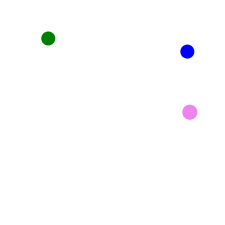

c_full ['blue', 'green', 'violet']
ii 2.0
['blue', 'green', 'violet']
ii 3.0
['blue', 'green', 'violet']
ii 4.0
['blue', 'green', 'violet']


<IPython.core.display.Javascript object>


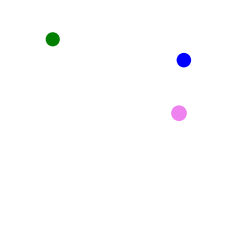

c_full ['blue', 'green', 'violet']
prev_c ['blue' 'green' 'violet']
c ['violet']
prev_c ['blue' 'green' 'violet']
c ['blue']
prev_c ['blue' 'green' 'violet']
c ['green']


<IPython.core.display.Javascript object>


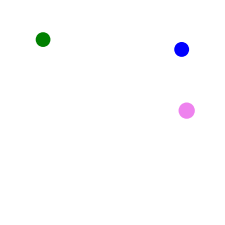

c_full ['violet', 'blue', 'green']
prev_c ['violet' 'blue' 'green']
c ['violet']
prev_c ['violet' 'blue' 'green']
c ['green']
prev_c ['violet' 'blue' 'green']
c ['blue']


<IPython.core.display.Javascript object>


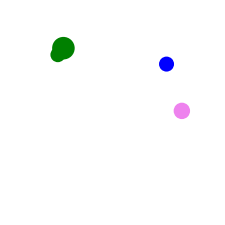

c_full ['violet', 'green', 'blue']
prev_c ['violet' 'green' 'blue']
c ['violet']
prev_c ['violet' 'green' 'blue']
c ['green']
prev_c ['violet' 'green' 'blue']
c ['blue']
prev_c ['violet' 'green' 'blue']
c ['green']


<IPython.core.display.Javascript object>


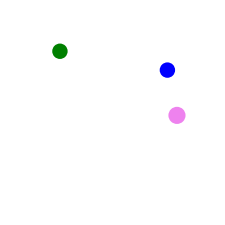

c_full ['violet', 'green', 'blue', 'green']
prev_c ['violet' 'green' 'blue' 'green']
c ['green']
prev_c ['violet' 'green' 'blue' 'green']
c ['violet']
prev_c ['violet' 'green' 'blue' 'green']
c ['blue']


<IPython.core.display.Javascript object>


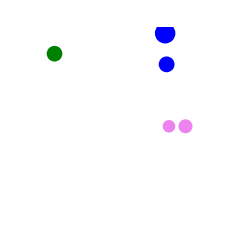

c_full ['green', 'violet', 'blue']
prev_c ['green' 'violet' 'blue']
c ['blue']
prev_c ['green' 'violet' 'blue']
c ['blue']
prev_c ['green' 'violet' 'blue']
c ['violet']
prev_c ['green' 'violet' 'blue']
c ['violet']
prev_c ['green' 'violet' 'blue']
c ['green']


<IPython.core.display.Javascript object>


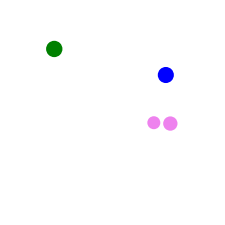

c_full ['blue', 'blue', 'violet', 'violet', 'green']
prev_c ['blue' 'blue' 'violet' 'violet' 'green']
c ['blue']
prev_c ['blue' 'blue' 'violet' 'violet' 'green']
c ['violet']
prev_c ['blue' 'blue' 'violet' 'violet' 'green']
c ['violet']
prev_c ['blue' 'blue' 'violet' 'violet' 'green']
c ['green']


<IPython.core.display.Javascript object>


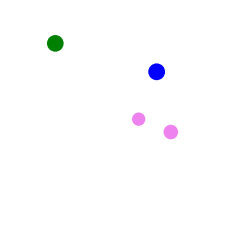

c_full ['blue', 'violet', 'violet', 'green']
prev_c ['blue' 'violet' 'violet' 'green']
c ['blue']
prev_c ['blue' 'violet' 'violet' 'green']
c ['violet']
prev_c ['blue' 'violet' 'violet' 'green']
c ['violet']
prev_c ['blue' 'violet' 'violet' 'green']
c ['green']


<IPython.core.display.Javascript object>


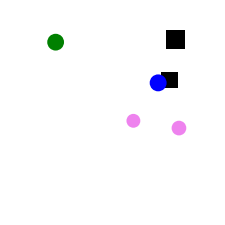

c_full ['blue', 'violet', 'violet', 'green']
prev_c ['blue' 'violet' 'violet' 'green']
c ['green']
prev_c ['blue' 'violet' 'violet' 'green']
c ['violet']
prev_c ['blue' 'violet' 'violet' 'green']
c ['violet']
prev_c ['blue' 'violet' 'violet' 'green']
c ['blue']


<IPython.core.display.Javascript object>


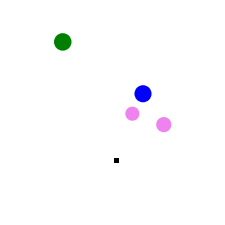

c_full ['green', 'violet', 'violet', 'black', 'blue', 'black']
prev_c ['green' 'violet' 'violet' 'black' 'blue' 'black']
c ['green']
prev_c ['green' 'violet' 'violet' 'black' 'blue' 'black']
c ['violet']
prev_c ['green' 'violet' 'violet' 'black' 'blue' 'black']
c ['blue']
prev_c ['green' 'violet' 'violet' 'black' 'blue' 'black']
c ['violet']


<IPython.core.display.Javascript object>


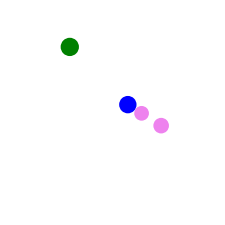

c_full ['green', 'violet', 'blue', 'violet', 'black']
prev_c ['green' 'violet' 'blue' 'violet' 'black']
c ['blue']
prev_c ['green' 'violet' 'blue' 'violet' 'black']
c ['violet']
prev_c ['green' 'violet' 'blue' 'violet' 'black']
c ['green']
prev_c ['green' 'violet' 'blue' 'violet' 'black']
c ['violet']


<IPython.core.display.Javascript object>


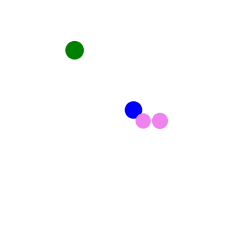

c_full ['blue', 'violet', 'green', 'violet']
prev_c ['blue' 'violet' 'green' 'violet']
c ['green']
prev_c ['blue' 'violet' 'green' 'violet']
c ['blue']
prev_c ['blue' 'violet' 'green' 'violet']
c ['violet']
prev_c ['blue' 'violet' 'green' 'violet']
c ['violet']


<IPython.core.display.Javascript object>


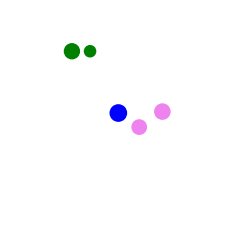

c_full ['green', 'blue', 'violet', 'violet']
prev_c ['green' 'blue' 'violet' 'violet']
c ['green']
prev_c ['green' 'blue' 'violet' 'violet']
c ['violet']
prev_c ['green' 'blue' 'violet' 'violet']
c ['blue']
prev_c ['green' 'blue' 'violet' 'violet']
c ['green']
prev_c ['green' 'blue' 'violet' 'violet']
c ['violet']


<IPython.core.display.Javascript object>


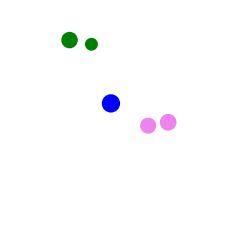

c_full ['green', 'violet', 'blue', 'green', 'violet']
prev_c ['green' 'violet' 'blue' 'green' 'violet']
c ['violet']
prev_c ['green' 'violet' 'blue' 'green' 'violet']
c ['green']
prev_c ['green' 'violet' 'blue' 'green' 'violet']
c ['green']
prev_c ['green' 'violet' 'blue' 'green' 'violet']
c ['violet']
prev_c ['green' 'violet' 'blue' 'green' 'violet']
c ['blue']


<IPython.core.display.Javascript object>


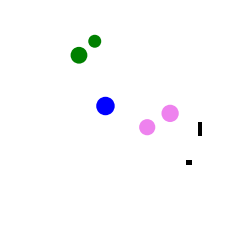

c_full ['violet', 'green', 'green', 'violet', 'blue']
prev_c ['violet' 'green' 'green' 'violet' 'blue']
c ['green']
prev_c ['violet' 'green' 'green' 'violet' 'blue']
c ['green']
prev_c ['violet' 'green' 'green' 'violet' 'blue']
c ['blue']
prev_c ['violet' 'green' 'green' 'violet' 'blue']
c ['violet']
prev_c ['violet' 'green' 'green' 'violet' 'blue']
c ['violet']


<IPython.core.display.Javascript object>


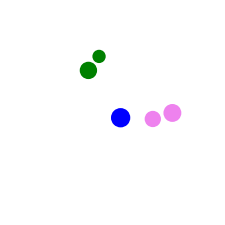

c_full ['black', 'green', 'green', 'black', 'blue', 'violet', 'violet']
prev_c ['black' 'green' 'green' 'black' 'blue' 'violet' 'violet']
c ['blue']
prev_c ['black' 'green' 'green' 'black' 'blue' 'violet' 'violet']
c ['green']
prev_c ['black' 'green' 'green' 'black' 'blue' 'violet' 'violet']
c ['green']
prev_c ['black' 'green' 'green' 'black' 'blue' 'violet' 'violet']
c ['violet']
prev_c ['black' 'green' 'green' 'black' 'blue' 'violet' 'violet']
c ['violet']


<IPython.core.display.Javascript object>


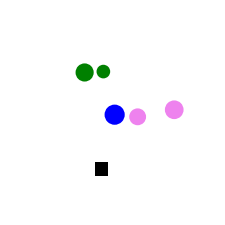

c_full ['blue', 'green', 'green', 'violet', 'violet']
prev_c ['blue' 'green' 'green' 'violet' 'violet']
c ['green']
prev_c ['blue' 'green' 'green' 'violet' 'violet']
c ['green']
prev_c ['blue' 'green' 'green' 'violet' 'violet']
c ['blue']
prev_c ['blue' 'green' 'green' 'violet' 'violet']
c ['violet']
prev_c ['blue' 'green' 'green' 'violet' 'violet']
c ['violet']


<IPython.core.display.Javascript object>


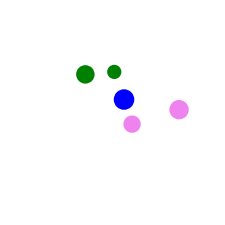

c_full ['black', 'green', 'green', 'blue', 'violet', 'violet']
prev_c ['black' 'green' 'green' 'blue' 'violet' 'violet']
c ['green']
prev_c ['black' 'green' 'green' 'blue' 'violet' 'violet']
c ['green']
prev_c ['black' 'green' 'green' 'blue' 'violet' 'violet']
c ['violet']
prev_c ['black' 'green' 'green' 'blue' 'violet' 'violet']
c ['blue']
prev_c ['black' 'green' 'green' 'blue' 'violet' 'violet']
c ['violet']


<IPython.core.display.Javascript object>


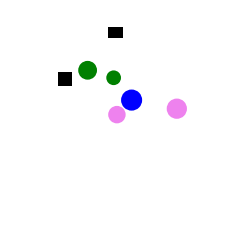

c_full ['green', 'green', 'violet', 'blue', 'violet']
prev_c ['green' 'green' 'violet' 'blue' 'violet']
c ['violet']
prev_c ['green' 'green' 'violet' 'blue' 'violet']
c ['green']
prev_c ['green' 'green' 'violet' 'blue' 'violet']
c ['green']
prev_c ['green' 'green' 'violet' 'blue' 'violet']
c ['blue']
prev_c ['green' 'green' 'violet' 'blue' 'violet']
c ['violet']


/home/mo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


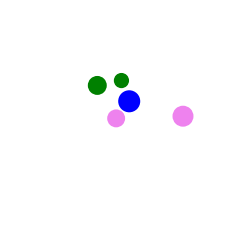

c_full ['violet', 'green', 'green', 'black', 'black', 'blue', 'violet']
prev_c ['violet' 'green' 'green' 'black' 'black' 'blue' 'violet']
c ['violet']
prev_c ['violet' 'green' 'green' 'black' 'black' 'blue' 'violet']
c ['green']
prev_c ['violet' 'green' 'green' 'black' 'black' 'blue' 'violet']
c ['blue']
prev_c ['violet' 'green' 'green' 'black' 'black' 'blue' 'violet']
c ['green']
prev_c ['violet' 'green' 'green' 'black' 'black' 'blue' 'violet']
c ['violet']


<IPython.core.display.Javascript object>


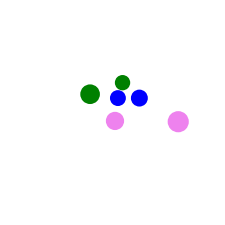

c_full ['violet', 'green', 'blue', 'green', 'violet']
prev_c ['violet' 'green' 'blue' 'green' 'violet']
c ['green']
prev_c ['violet' 'green' 'blue' 'green' 'violet']
c ['green']
prev_c ['violet' 'green' 'blue' 'green' 'violet']
c ['violet']
prev_c ['violet' 'green' 'blue' 'green' 'violet']
c ['violet']
prev_c ['violet' 'green' 'blue' 'green' 'violet']
c ['blue']
prev_c ['violet' 'green' 'blue' 'green' 'violet']
c ['blue']


<IPython.core.display.Javascript object>


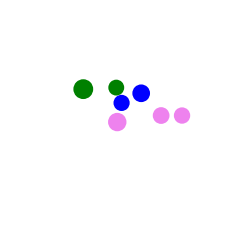

c_full ['green', 'green', 'violet', 'violet', 'blue', 'blue']
prev_c ['green' 'green' 'violet' 'violet' 'blue' 'blue']
c ['blue']
prev_c ['green' 'green' 'violet' 'violet' 'blue' 'blue']
c ['blue']
prev_c ['green' 'green' 'violet' 'violet' 'blue' 'blue']
c ['green']
prev_c ['green' 'green' 'violet' 'violet' 'blue' 'blue']
c ['violet']
prev_c ['green' 'green' 'violet' 'violet' 'blue' 'blue']
c ['violet']
prev_c ['green' 'green' 'violet' 'violet' 'blue' 'blue']
c ['violet']
prev_c ['green' 'green' 'violet' 'violet' 'blue' 'blue']
c ['green']


<IPython.core.display.Javascript object>


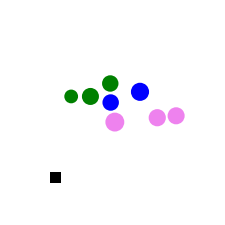

c_full ['blue', 'blue', 'green', 'violet', 'violet', 'violet', 'green']
prev_c ['blue' 'blue' 'green' 'violet' 'violet' 'violet' 'green']
c ['green']
prev_c ['blue' 'blue' 'green' 'violet' 'violet' 'violet' 'green']
c ['blue']
prev_c ['blue' 'blue' 'green' 'violet' 'violet' 'violet' 'green']
c ['green']
prev_c ['blue' 'blue' 'green' 'violet' 'violet' 'violet' 'green']
c ['blue']
prev_c ['blue' 'blue' 'green' 'violet' 'violet' 'violet' 'green']
c ['green']
prev_c ['blue' 'blue' 'green' 'violet' 'violet' 'violet' 'green']
c ['violet']
prev_c ['blue' 'blue' 'green' 'violet' 'violet' 'violet' 'green']
c ['violet']
prev_c ['blue' 'blue' 'green' 'violet' 'violet' 'violet' 'green']
c ['violet']


<IPython.core.display.Javascript object>


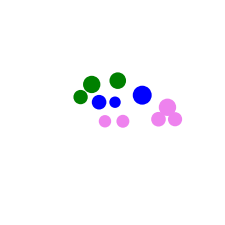

c_full ['green', 'blue', 'green', 'blue', 'green', 'violet', 'violet', 'violet', 'black']
prev_c ['green' 'blue' 'green' 'blue' 'green' 'violet' 'violet' 'violet' 'black']
c ['blue']
prev_c ['green' 'blue' 'green' 'blue' 'green' 'violet' 'violet' 'violet' 'black']
c ['violet']
prev_c ['green' 'blue' 'green' 'blue' 'green' 'violet' 'violet' 'violet' 'black']
c ['green']
prev_c ['green' 'blue' 'green' 'blue' 'green' 'violet' 'violet' 'violet' 'black']
c ['violet']
prev_c ['green' 'blue' 'green' 'blue' 'green' 'violet' 'violet' 'violet' 'black']
c ['violet']
prev_c ['green' 'blue' 'green' 'blue' 'green' 'violet' 'violet' 'violet' 'black']
c ['violet']
prev_c ['green' 'blue' 'green' 'blue' 'green' 'violet' 'violet' 'violet' 'black']
c ['blue']
prev_c ['green' 'blue' 'green' 'blue' 'green' 'violet' 'violet' 'violet' 'black']
c ['green']
prev_c ['green' 'blue' 'green' 'blue' 'green' 'violet' 'violet' 'violet' 'black']
c ['green']
prev_c ['green' 'blue' 'green' 'blue' 'green' 'violet' 'violet

<IPython.core.display.Javascript object>


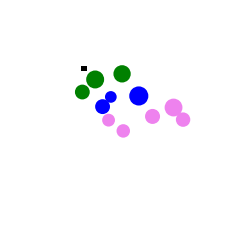

c_full ['blue', 'violet', 'green', 'violet', 'violet', 'violet', 'blue', 'green', 'green', 'blue', 'violet']
prev_c ['blue' 'violet' 'green' 'violet' 'violet' 'violet' 'blue' 'green' 'green'
 'blue' 'violet']
c ['blue']
prev_c ['blue' 'violet' 'green' 'violet' 'violet' 'violet' 'blue' 'green' 'green'
 'blue' 'violet']
c ['violet']
prev_c ['blue' 'violet' 'green' 'violet' 'violet' 'violet' 'blue' 'green' 'green'
 'blue' 'violet']
c ['violet']
prev_c ['blue' 'violet' 'green' 'violet' 'violet' 'violet' 'blue' 'green' 'green'
 'blue' 'violet']
c ['violet']
prev_c ['blue' 'violet' 'green' 'violet' 'violet' 'violet' 'blue' 'green' 'green'
 'blue' 'violet']
c ['violet']
prev_c ['blue' 'violet' 'green' 'violet' 'violet' 'violet' 'blue' 'green' 'green'
 'blue' 'violet']
c ['blue']
prev_c ['blue' 'violet' 'green' 'violet' 'violet' 'violet' 'blue' 'green' 'green'
 'blue' 'violet']
c ['green']
prev_c ['blue' 'violet' 'green' 'violet' 'violet' 'violet' 'blue' 'green' 'green'
 'blue' 'violet']
c ['g

<IPython.core.display.Javascript object>


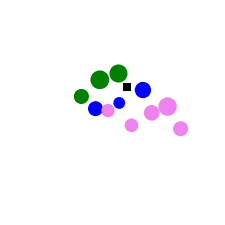

c_full ['blue', 'violet', 'violet', 'violet', 'violet', 'black', 'blue', 'green', 'green', 'blue', 'green', 'violet']
prev_c ['blue' 'violet' 'violet' 'violet' 'violet' 'black' 'blue' 'green' 'green'
 'blue' 'green' 'violet']
c ['blue']
prev_c ['blue' 'violet' 'violet' 'violet' 'violet' 'black' 'blue' 'green' 'green'
 'blue' 'green' 'violet']
c ['blue']
prev_c ['blue' 'violet' 'violet' 'violet' 'violet' 'black' 'blue' 'green' 'green'
 'blue' 'green' 'violet']
c ['violet']
prev_c ['blue' 'violet' 'violet' 'violet' 'violet' 'black' 'blue' 'green' 'green'
 'blue' 'green' 'violet']
c ['violet']
prev_c ['blue' 'violet' 'violet' 'violet' 'violet' 'black' 'blue' 'green' 'green'
 'blue' 'green' 'violet']
c ['blue']
prev_c ['blue' 'violet' 'violet' 'violet' 'violet' 'black' 'blue' 'green' 'green'
 'blue' 'green' 'violet']
c ['violet']
prev_c ['blue' 'violet' 'violet' 'violet' 'violet' 'black' 'blue' 'green' 'green'
 'blue' 'green' 'violet']
c ['green']
prev_c ['blue' 'violet' 'violet' 'violet' 

<IPython.core.display.Javascript object>


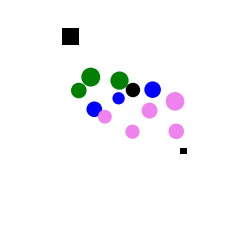

c_full ['blue', 'blue', 'violet', 'violet', 'blue', 'violet', 'green', 'violet', 'green', 'black', 'violet', 'green']
prev_c ['blue' 'blue' 'violet' 'violet' 'blue' 'violet' 'green' 'violet' 'green'
 'black' 'violet' 'green']
c ['violet']
prev_c ['blue' 'blue' 'violet' 'violet' 'blue' 'violet' 'green' 'violet' 'green'
 'black' 'violet' 'green']
c ['green']
prev_c ['blue' 'blue' 'violet' 'violet' 'blue' 'violet' 'green' 'violet' 'green'
 'black' 'violet' 'green']
c ['blue']
prev_c ['blue' 'blue' 'violet' 'violet' 'blue' 'violet' 'green' 'violet' 'green'
 'black' 'violet' 'green']
c ['violet']
prev_c ['blue' 'blue' 'violet' 'violet' 'blue' 'violet' 'green' 'violet' 'green'
 'black' 'violet' 'green']
c ['green']
prev_c ['blue' 'blue' 'violet' 'violet' 'blue' 'violet' 'green' 'violet' 'green'
 'black' 'violet' 'green']
c ['green']
prev_c ['blue' 'blue' 'violet' 'violet' 'blue' 'violet' 'green' 'violet' 'green'
 'black' 'violet' 'green']
c ['blue']
prev_c ['blue' 'blue' 'violet' 'violet' 'b

<IPython.core.display.Javascript object>


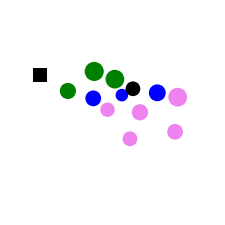

c_full ['violet', 'green', 'black', 'blue', 'violet', 'black', 'green', 'green', 'blue', 'blue', 'violet', 'violet', 'violet', 'black']
prev_c ['violet' 'green' 'black' 'blue' 'violet' 'black' 'green' 'green' 'blue'
 'blue' 'violet' 'violet' 'violet' 'black']
c ['blue']
prev_c ['violet' 'green' 'black' 'blue' 'violet' 'black' 'green' 'green' 'blue'
 'blue' 'violet' 'violet' 'violet' 'black']
c ['violet']
prev_c ['violet' 'green' 'black' 'blue' 'violet' 'black' 'green' 'green' 'blue'
 'blue' 'violet' 'violet' 'violet' 'black']
c ['green']
prev_c ['violet' 'green' 'black' 'blue' 'violet' 'black' 'green' 'green' 'blue'
 'blue' 'violet' 'violet' 'violet' 'black']
c ['violet']
prev_c ['violet' 'green' 'black' 'blue' 'violet' 'black' 'green' 'green' 'blue'
 'blue' 'violet' 'violet' 'violet' 'black']
c ['green']
prev_c ['violet' 'green' 'black' 'blue' 'violet' 'black' 'green' 'green' 'blue'
 'blue' 'violet' 'violet' 'violet' 'black']
c ['black']
prev_c ['violet' 'green' 'black' 'blue' 'violet

<IPython.core.display.Javascript object>


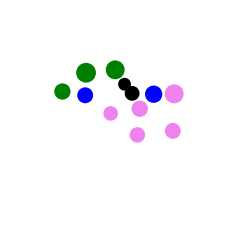

c_full ['blue', 'black', 'violet', 'green', 'violet', 'green', 'black', 'green', 'violet', 'blue', 'violet', 'violet', 'blue']
prev_c ['blue' 'black' 'violet' 'green' 'violet' 'green' 'black' 'green' 'violet'
 'blue' 'violet' 'violet' 'blue']
c ['violet']
prev_c ['blue' 'black' 'violet' 'green' 'violet' 'green' 'black' 'green' 'violet'
 'blue' 'violet' 'violet' 'blue']
c ['blue']
prev_c ['blue' 'black' 'violet' 'green' 'violet' 'green' 'black' 'green' 'violet'
 'blue' 'violet' 'violet' 'blue']
c ['violet']
prev_c ['blue' 'black' 'violet' 'green' 'violet' 'green' 'black' 'green' 'violet'
 'blue' 'violet' 'violet' 'blue']
c ['black']
prev_c ['blue' 'black' 'violet' 'green' 'violet' 'green' 'black' 'green' 'violet'
 'blue' 'violet' 'violet' 'blue']
c ['green']
prev_c ['blue' 'black' 'violet' 'green' 'violet' 'green' 'black' 'green' 'violet'
 'blue' 'violet' 'violet' 'blue']
c ['green']
prev_c ['blue' 'black' 'violet' 'green' 'violet' 'green' 'black' 'green' 'violet'
 'blue' 'violet' 'viol

<IPython.core.display.Javascript object>


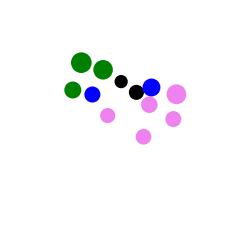

c_full ['violet', 'blue', 'violet', 'black', 'green', 'green', 'black', 'violet', 'blue', 'violet', 'green', 'violet']
prev_c ['violet' 'blue' 'violet' 'black' 'green' 'green' 'black' 'violet' 'blue'
 'violet' 'green' 'violet']
c ['blue']
prev_c ['violet' 'blue' 'violet' 'black' 'green' 'green' 'black' 'violet' 'blue'
 'violet' 'green' 'violet']
c ['green']
prev_c ['violet' 'blue' 'violet' 'black' 'green' 'green' 'black' 'violet' 'blue'
 'violet' 'green' 'violet']
c ['black']
prev_c ['violet' 'blue' 'violet' 'black' 'green' 'green' 'black' 'violet' 'blue'
 'violet' 'green' 'violet']
c ['violet']
prev_c ['violet' 'blue' 'violet' 'black' 'green' 'green' 'black' 'violet' 'blue'
 'violet' 'green' 'violet']
c ['black']
prev_c ['violet' 'blue' 'violet' 'black' 'green' 'green' 'black' 'violet' 'blue'
 'violet' 'green' 'violet']
c ['green']
prev_c ['violet' 'blue' 'violet' 'black' 'green' 'green' 'black' 'violet' 'blue'
 'violet' 'green' 'violet']
c ['violet']
prev_c ['violet' 'blue' 'violet' 

<IPython.core.display.Javascript object>


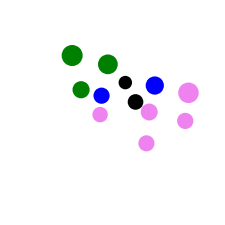

c_full ['blue', 'green', 'black', 'violet', 'black', 'green', 'violet', 'violet', 'violet', 'blue', 'green', 'violet']
prev_c ['blue' 'green' 'black' 'violet' 'black' 'green' 'violet' 'violet'
 'violet' 'blue' 'green' 'violet']
c ['green']
prev_c ['blue' 'green' 'black' 'violet' 'black' 'green' 'violet' 'violet'
 'violet' 'blue' 'green' 'violet']
c ['blue']
prev_c ['blue' 'green' 'black' 'violet' 'black' 'green' 'violet' 'violet'
 'violet' 'blue' 'green' 'violet']
c ['green']
prev_c ['blue' 'green' 'black' 'violet' 'black' 'green' 'violet' 'violet'
 'violet' 'blue' 'green' 'violet']
c ['violet']
prev_c ['blue' 'green' 'black' 'violet' 'black' 'green' 'violet' 'violet'
 'violet' 'blue' 'green' 'violet']
c ['violet']
prev_c ['blue' 'green' 'black' 'violet' 'black' 'green' 'violet' 'violet'
 'violet' 'blue' 'green' 'violet']
c ['black']
prev_c ['blue' 'green' 'black' 'violet' 'black' 'green' 'violet' 'violet'
 'violet' 'blue' 'green' 'violet']
c ['violet']
prev_c ['blue' 'green' 'black' '

In [14]:
def colour_func(ii,prev_c,prev_id,id1,id2):
    id1=id1[id2==ii]
    #print(id1,id2)
    if len(id1)==0:
        print('ii',ii)
        print(prev_c)
        return prev_c[int(ii-2)],False
    if id1==1:
        return 'black',True
    else:
        #print(id1,prev_id,prev_c)
        print('prev_c',np.array(prev_c))
        c_cf=np.array(prev_c)[prev_id==id1[0]]
        print('c',c_cf)
    return c_cf[0],False
    


c=['blue','green','violet']

id,tt = np.loadtxt('./'+str(run)+'/'+'timetable.txt', delimiter='\t', usecols=(0,1), unpack=True)
id=id[1:]
tt=tt[1:]
id_f=[2,3,4]


print(c[id_f==1])


    


for t in range(31):
    
        
    
    my_dpi=96
    pix=150
    
    
    fig = plt.figure(figsize=(pix/my_dpi, pix/my_dpi), dpi=my_dpi)
    fig = plt.gcf()
    ax = fig.gca()
    
    print('c_full',c)
    prev_c=c
    prev_id=id_f
    
    c=[]
    id_f=[]
    
    for u in range(len(id[tt==t])):
        x_n=x[int(id[tt==t][u]-1)]  
        y_n=y[int(id[tt==t][u]-1)]
        r_n=r[int(id[tt==t][u]-1)]  
        c_cf,rec=colour_func(id[tt==t][u],prev_c,prev_id,id1,id2)
        c.append(c_cf)
        #print('c.app',c)
        id_f.append(id[tt==t][u])
        if rec:
            rec1=plt.Rectangle((x_n,y_n), r_n, r_n,fc=c_cf,ec=c_cf) 
            ax.add_patch(rec1)
        else:
            circ1=plt.Circle((x_n,y_n), r_n, color=c_cf)
            ax.add_patch(circ1)
        
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.xlim(0,1)
    plt.ylim(0,1)
    
    plt.savefig('./'+str(run)+'_GT'+'/'+str(t)+'.png',dpi=my_dpi,transparent=False) 

In [ ]:
x_t=[]
for j in range(len(ide)):
    x_t=[]
    x_t.append(x[ide==j])
    print(str(j),x_t)